# CESM Test Case Documentation

This is a set of test data from the Community Earth System Model (CESM)! Below is an example case using the `B1850` configuration, fully coupled!

## Data Availability
An [Intake-esm](https://intake-esm.readthedocs.io/en/latest/) catalog was generated for the model and is stored can be accessed using the following filepath

`/glade/work/mgrover/cesm-hist-test.json`

In [47]:
import intake
from graphviz import Digraph

In [48]:
col = intake.open_esm_datastore('/glade/work/mgrover/cesm-hist-test.json')

In [51]:
df = col.df

In [52]:
# Create Digraph object - use the left to right orientation instead of vertical
dot = Digraph(graph_attr={'rankdir': 'LR'})
dot.format = 'pdf'

# Start counting at one for node numbers
num_node = 1

# Loop through the different cases
for case in df.case.unique():
    case_i = num_node
    dot.node(str(case_i), label=case)
    num_node += 1

    # Loop through the different components in each case
    for component in df.loc[df.case == case].component.unique():
        comp_i = num_node
        dot.node(str(comp_i), label=component)
        dot.edge(str(case_i), str(comp_i))
        num_node += 1

        # Loop through the frequency in each component within each experiment
        for frequency in df.loc[
            (df.case == case) & (df.component == component)
        ].frequency.unique():
            freq_i = num_node
            
            # Pull out the the stream information
            stream = df.loc[(df.case == case) & (df.component == component) &
                            (df.frequency == frequency)].stream.values[0]
            
            # Add both stream and frequency information to these bubbles
            dot.node(str(freq_i), label=f'stream: {stream} \n frequency: {frequency}')
            dot.edge(str(comp_i), str(freq_i))
            num_node += 1
        comp_i += 1
    case_i += 1

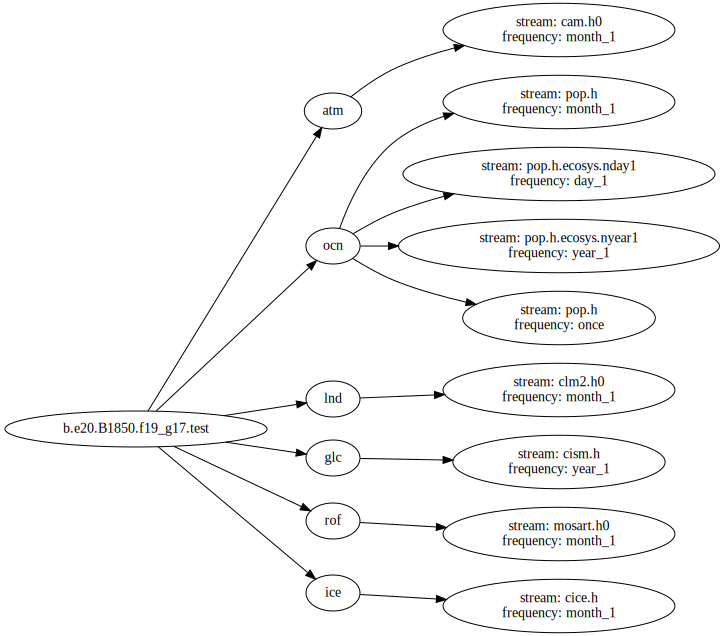

In [53]:
dot